## Otimização de Modelo Pré-Treinado para Detecção de Fraudes em Cartões de Crédito

### Aluno: Vinícius Oliveira Fernandes

In [75]:
%pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 57.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import gdown
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [58]:
file_credicard_fraudes = "1nriPPuYUMXeB6BkCjz_bQI_45WZfxViC"
url_fraudes = f"https://drive.google.com/uc?id={file_credicard_fraudes}"
gdown.download(url_fraudes, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1nriPPuYUMXeB6BkCjz_bQI_45WZfxViC
From (redirected): https://drive.google.com/uc?id=1nriPPuYUMXeB6BkCjz_bQI_45WZfxViC&confirm=t&uuid=f038f89a-0950-49f5-8045-11192533d7bf
To: /content/creditcard.csv
100%|██████████| 151M/151M [00:01<00:00, 150MB/s]


'creditcard.csv'

In [59]:
fraudes_credicard = pd.read_csv('/content/creditcard.csv')

In [60]:
fraudes_credicard.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

Text(0.5, 0, 'Amount')

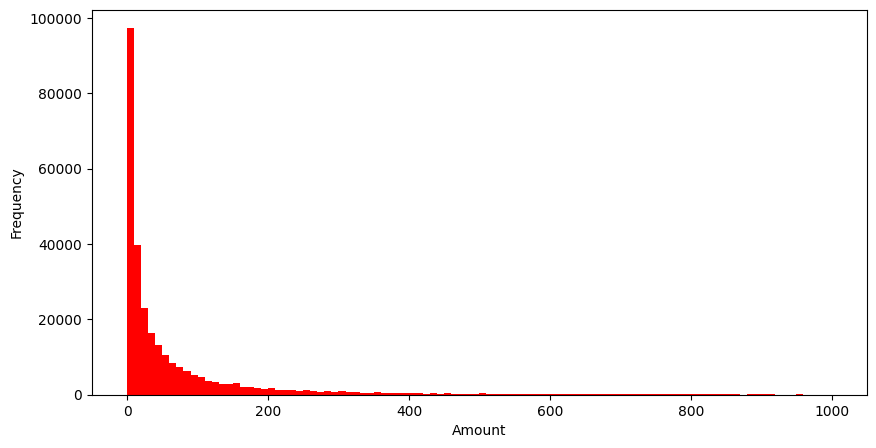

In [61]:
fraudes_credicard[fraudes_credicard['Amount'] < 1000]['Amount'].plot(kind='hist', bins=100, figsize=(10,5), color='red').set_xlabel('Amount')

In [62]:
fraudes_credicard['Class'].value_counts()

,count
Class,
0,284315
1,492


In [63]:
scaler = MinMaxScaler()
fraudes_credicard[['Amount']] = scaler.fit_transform(fraudes_credicard[['Amount']])

In [64]:
def balanciar(df):
  rus = RandomUnderSampler(random_state=42)
  X = fraudes_credicard.drop('Class', axis=1)
  y = fraudes_credicard['Class']
  X_res, y_res = rus.fit_resample(X, y)
  return pd.concat([X_res, y_res], axis=1)

In [65]:
from imblearn.under_sampling import RandomUnderSampler

fraudes_credicard = balanciar(fraudes_credicard)

In [66]:
X = fraudes_credicard.drop(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], axis=1).values
y = fraudes_credicard['Class'].values

In [67]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

In [68]:
model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [69]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,977 (11.63 KB)

 Trainable params: 2,977 (11.63 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall', 'mse'])

In [71]:
result = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5195 - loss: 100.0286 - mse: 0.4131 - precision: 0.3054 - recall: 0.2580 - val_accuracy: 0.4932 - val_loss: 0.6933 - val_mse: 0.2501 - val_precision: 0.4932 - val_recall: 1.0000
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5167 - loss: 0.6929 - mse: 0.2499 - precision: 0.5167 - recall: 1.0000 - val_accuracy: 0.4932 - val_loss: 0.6933 - val_mse: 0.2501 - val_precision: 0.4932 - val_recall: 1.0000
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4927 - loss: 0.6933 - mse: 0.2501 - precision: 0.4927 - recall: 1.0000 - val_accuracy: 0.4932 - val_loss: 0.6933 - val_mse: 0.2501 - val_precision: 0.4932 - val_recall: 1.0000
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5114 - loss: 0.6930 - mse: 0.2499 - precision: 0.5114 - recall: 1.0000 - val_accuracy: 0.4932 - val_loss: 0.6933 - val_mse: 0.2501 - val_precision: 0.4932 - val_recall: 1.0000
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━

In [72]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_val = model.predict(x_val).ravel()
y_pred_val_class = (y_pred_val > 0.5).astype(int)

report = classification_report(y_val, y_pred_val_class, target_names=['No Fraud', 'Fraud'])
auc_score = roc_auc_score(y_val, y_pred_val)

print('Classification Report:\n', report)
print('AUC-ROC Score:', auc_score)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Classification Report:
               precision    recall  f1-score   support

    No Fraud       0.00      0.00      0.00       150
       Fraud       0.49      1.00      0.66       146

    accuracy                           0.49       296
   macro avg       0.25      0.50      0.33       296
weighted avg       0.24      0.49      0.33       296

AUC-ROC Score: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Novo Modelo

In [85]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow import keras

# Função de construção do modelo
def build_model(activation='relu', neurons=64, optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Input(shape=(x_train.shape[1],)),
        keras.layers.Dense(neurons, activation=activation),
        keras.layers.Dense(neurons // 2, activation=activation),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])
    return model

model = KerasClassifier(
    model=build_model,
    activation='relu', neurons=64, optimizer='adam',
    batch_size=32, epochs=20, verbose=0
)

param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [20, 30, 40],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'neurons': [32, 64, 128]
}

search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=3)
search_result = search.fit(x_train, y_train)

print("Melhor: %f usando %s" % (search_result.best_score_, search_result.best_params_))

y_pred_val_opt = search_result.best_estimator_.predict(x_val)
y_pred_val_opt_class = (y_pred_val_opt > 0.5).astype(int)

report_opt = classification_report(y_val, y_pred_val_opt_class, target_names=['No Fraud', 'Fraud'])
auc_score_opt = roc_auc_score(y_val, y_pred_val_opt)

print('Classification Report - Modelo Otimizado:\n', report_opt)
print('AUC-ROC Score - Modelo Otimizado:', auc_score_opt)

print('\nComparação de Resultados:')
print('Original AUC-ROC Score:', auc_score)
print('Otimizado AUC-ROC Score:', auc_score_opt)

Melhor: 0.562338 usando {'optimizer': 'rmsprop', 'neurons': 64, 'epochs': 30, 'batch_size': 32, 'activation': 'relu'}
Classification Report - Modelo Otimizado:
               precision    recall  f1-score   support

    No Fraud       0.52      0.98      0.68       150
       Fraud       0.79      0.08      0.14       146

    accuracy                           0.53       296
   macro avg       0.65      0.53      0.41       296
weighted avg       0.65      0.53      0.41       296

AUC-ROC Score - Modelo Otimizado: 0.5276712328767124

Comparação de Resultados:
Original AUC-ROC Score: 0.5
Otimizado AUC-ROC Score: 0.5276712328767124
